## Descripción del Proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
(Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.)
El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

Como empleado de la tienda en línea Ice, que se especializa en la venta de videojuegos a nivel mundial, estoy analizando datos de ventas y reseñas de usuarios y expertos, así como información sobre géneros, plataformas y clasificaciones de edad proporcionadas por la Entertainment Software Rating Board (ESRB), para identificar patrones que determinen si un juego será exitoso o no. Con datos que se remontan a 2016 y estando en diciembre de ese año, estoy preparando una campaña publicitaria para 2017 con el objetivo de promocionar juegos prometedores. Sin importar si estoy pronosticando las ventas para 2017 basándome en los datos de 2016 o planificando campañas para años posteriores, lo importante es adquirir experiencia en el análisis de datos para la toma de decisiones comerciales.

## Inicialización

In [103]:
# Cargamos todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
from math import factorial
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

## Cargar los datos

In [104]:
# Cargamos el archivo de datos en el Dataframe 'df'
df = pd.read_csv('/datasets/games.csv')

## Explorar datos iniciales

In [105]:
# Imprimimos la información general/resumen sobre el DataFrame de los juegos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [106]:
# Imprimimos una muestra de los datos para los juegos
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Descripción de datos**

- Name (Nombre)
- Platform (Plataforma)
- Year_of_Release (Año de lanzamiento)
- Genre (Género)
- NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
- EU_sales (ventas en Europa en millones de dólares estadounidenses)
- JP_sales (ventas en Japón en millones de dólares estadounidenses)
- Other_sales (ventas en otros países en millones de dólares estadounidenses)
- Critic_Score (máximo de 100)
- User_Score (máximo de 10)
- Clasificación (ESRB)

In [107]:
# Veamos cuantos valores ausentes tenemos en nuestro Dataframe
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [108]:
# Caclulamos el porcentaje de los valores nulos por columna
null_percentage = df.isnull().mean() * 100
null_percentage

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [109]:
# Busquemos si existe alguna relación entre los valores nulos
df[df['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [110]:
df[df['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


A primera vista parece ser que los valores nulos de la columna **'Year_of_Release'** no tienen relación alguna con los demás valores nulos, sin embargo, los valores nulos de las columnas **Critic_Score, User_Score, Rating** coinciden en sus valores nulos. Esto indica que no podremos hacer una imputación entre estas variables.

In [111]:
# Veamos si nuestro Dataframe contiene duplicados
df.duplicated().any()

False

In [112]:
# Veamos las plataformas que tenemos
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [113]:
# Veamos desde que año hasta que año tenemos juegos lanzados
df['Year_of_Release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [114]:
# Veamos nuestras categorias de juegos
df['Genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [115]:
df['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [116]:
df['Rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

1. Reemplazaremos los nombres de las columnas en minúsculas para facilitar su llamado.
2. Podemos observar en las columnas **'Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating'** que contamos con valores nulos, por su ausencia de valores en las filas. Tendremos que buscar la razón por la cual tenemos datos ausentes, explicarlos y tratarlos de la mejor manera.
3. En la columna **'Year_of_Release'** tenemos valores tipo float, por lo que debemos cambiarlos a enteros ya que hacen referencia al año de lanzamiento.
4. La columna **'User_score'** tiene valores tipo object que cambiaremos a tipo numéricos para realizar un análisis sobre estos datos.
5. Calculemos las ventas totales para cada juego y colocar estos valores en una columna separada para un análisis más completo.
6. Tratemos los valores 'tbd' de la columna 'User_Score' para hacer usO de la columna con mayor facilidad.

## Preparar los datos

In [117]:
# Reemplazamos los nombres de las columnas en minúsculas
df.columns = df.columns.str.lower()

In [118]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Tratemos los valores ausentes**

Vemos que es considerable el porcentaje de los valores nulos, por lo que debemos rellenarlos

Como pudimos ver en la exploración de datos, en la columna **'name'** tenemos solamente **dos juegos sin nombre**, por lo que podemos eliminarlos, ya que sería muy difícil encontrar el nombre con los datos que tenemos sobre tales juegos.

In [119]:
df.dropna(subset=['name'], inplace=True)

In [120]:
# Verificamos nustro cambio
df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [121]:
# Buscamos si existe algun factor con el que nos podamos apoyar para tratar valores nulos
duplicates = df[df.duplicated(subset='name')]
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [122]:
names_with_year = df[df['name'].str.contains('20')]
names_with_year[names_with_year['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2492,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M


In [123]:
# Rellenamos los años de lanzamiento, teniendo en cuenta que los juegos son lanzados un año antes del año en el que menciona el juego (esto es general en la industria)
df.loc[183, 'year_of_release'] = 2003
df.loc[377, 'year_of_release'] = 2003
df.loc[475, 'year_of_release'] = 2005
df.loc[1650, 'year_of_release'] = 2002
df.loc[2492, 'year_of_release'] = 2002
df.loc[2572, 'year_of_release'] = 2008
df.loc[3486, 'year_of_release'] = 2001
df.loc[4775, 'year_of_release'] = 2002
df.loc[5156, 'year_of_release'] = 2002
df.loc[5336, 'year_of_release'] = 2002
df.loc[5655, 'year_of_release'] = 2004
df.loc[5889, 'year_of_release'] = 2002
df.loc[8918, 'year_of_release'] = 2004
df.loc[13195, 'year_of_release'] = 2010
df.loc[13929, 'year_of_release'] = 2005
df.loc[15953, 'year_of_release'] = 2007
df.loc[16079, 'year_of_release'] = 2006
df.loc[16373, 'year_of_release'] = 2007

In [124]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [125]:
gta_v_rows = df[df['name'] == 'Grand Theft Auto V']
gta_v_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M


Podemos ver que tenemos los mismos juegos para diferentes plataformas, por lo que comparten datos. Esto nos puede ayudar a rellenar algunos valores nulos. Empecemos por el año de lanzamiento, ya que es la unica columna con valores nulos que no tiene relación con otros valores nulos de otras columnas.

In [126]:
# Tratemos la columna 'year of release'
df['year_of_release'].isna().sum()

251

In [127]:
name_grouped = df.groupby('name')['year_of_release'].mean()

# Iteramos sobre los índices donde 'year_of_release' es nulo
for i in df[df['year_of_release'].isnull()].index:
# Obtenemos el nombre del juego en la misma fila
    game_name = df.loc[i, 'name']
    
# Vemos si el nombre del juego tiene una media de los años de lanzamiento calculada
    if game_name in name_grouped.index:
# Rellenamos el valor nulo con la media de año de lanzamiento del juego
        df.at[i, 'year_of_release'] = name_grouped[game_name]

In [128]:
# Redondeamos valores para no tener años tipo float // esto nos ayudará al momento de graficar
df['year_of_release'] = np.ceil(df['year_of_release'])

In [129]:
df['year_of_release'].isna().sum()

139

In [130]:
# Tratemos la columna 'critic_score'
df['critic_score'].isna().sum()

8576

In [131]:
critic_grouped = df.groupby('name')['critic_score'].mean()

# Iteramos sobre los índices donde 'critic_score' es nulo
for i in df[df['critic_score'].isnull()].index:
# Obtenemos el nombre del juego en la misma fila
    game_name = df.loc[i, 'name']
    
# Vemos si el nombre del juego tiene una media de los años de lanzamiento calculada
    if game_name in critic_grouped.index:
# Rellenamos el valor nulo con la media 'critic_score' del juego
        df.at[i, 'critic_score'] = critic_grouped[game_name]

In [132]:
df['critic_score'].isna().sum()

7615

Ahora tratemos de rellenar los valores restantes de los años de lanzamiento por plataforma, si los valores son pocos, podemos buscar su lanzamiento por internet o en este caso, Chat GPT podría ayudarnos bastante, ya que es un proceso tedioso y repeptitivo, lo que nos podría ocasionar errores si lo hacemos de forma manual.

In [133]:
df[(df['year_of_release'].isna()) & (df['platform'] == 'PS2')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.00,0.35,82.0,6.8,T
2108,Suikoden III,PS2,NaN,Role-Playing,0.29,0.23,0.38,0.08,86.0,7.7,T
3187,Monster Hunter 2,PS2,NaN,Role-Playing,0.00,0.00,0.63,0.00,NaN,NaN,NaN
4848,Harvest Moon: Save the Homeland,PS2,NaN,Simulation,0.19,0.15,0.00,0.05,76.0,8.8,E
6101,Haven: Call of the King,PS2,NaN,Platform,0.14,0.11,0.00,0.04,69.0,6.9,T
6954,Jet X20,PS2,NaN,Racing,0.11,0.09,0.00,0.03,NaN,NaN,NaN
7008,Tribes: Aerial Assault,PS2,NaN,Shooter,0.11,0.09,0.00,0.03,73.0,8.8,T
7332,Yu Yu Hakusho: Dark Tournament,PS2,NaN,Fighting,0.10,0.08,0.00,0.03,56.0,8.5,T
8364,Sword of the Samurai,PS2,NaN,Fighting,0.00,0.00,0.17,0.00,NaN,NaN,NaN
8884,eJay Clubworld,PS2,NaN,Misc,0.07,0.06,0.00,0.02,69.0,8.6,E


In [134]:
df.loc[1840, 'year_of_release'] = 2007
df.loc[2108, 'year_of_release'] = 2002
df.loc[3187, 'year_of_release'] = 2006
df.loc[4848, 'year_of_release'] = 2001
df.loc[6101, 'year_of_release'] = 2002
df.loc[6954, 'year_of_release'] = 2002
df.loc[7008, 'year_of_release'] = 2002
df.loc[7332, 'year_of_release'] = 2004
df.loc[8364, 'year_of_release'] = 2005
df.loc[8884, 'year_of_release'] = 2002
df.loc[9761, 'year_of_release'] = 2006
df.loc[11000, 'year_of_release'] = 2005
df.loc[12011, 'year_of_release'] = 2004
df.loc[12584, 'year_of_release'] = 2005
df.loc[12959, 'year_of_release'] = 2007
df.loc[14597, 'year_of_release'] = 2005
df.loc[15754, 'year_of_release'] = 2004

In [135]:
# Ahora con la plataforma 'DS'
df[(df['year_of_release'].isna()) & (df['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3289,Advance Wars: Days of Ruin,DS,NaN,Strategy,0.43,0.12,0.00,0.05,86.0,8.7,E10+
9664,Charm Girls Club: My Fashion Mall,DS,NaN,Simulation,0.12,0.00,0.00,0.01,NaN,tbd,E
9855,The Daring Game for Girls,DS,NaN,Adventure,0.11,0.00,0.00,0.01,NaN,tbd,E
10486,Atsumare! Power Pro Kun no DS Koushien,DS,NaN,Sports,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10612,My Healthy Cooking Coach,DS,NaN,Simulation,0.09,0.00,0.00,0.01,NaN,tbd,E
10764,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10837,Egg Monster Hero,DS,NaN,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,E
11338,Charm Girls Club: My Fashion Show,DS,NaN,Simulation,0.08,0.00,0.00,0.01,NaN,tbd,E
11790,Mega Man Battle Network: Operation Shooting Star,DS,NaN,Role-Playing,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12003,Tornado,DS,NaN,Action,0.07,0.00,0.00,0.00,44.0,tbd,E


In [136]:
df.loc[3289, 'year_of_release'] = 2008
df.loc[9664, 'year_of_release'] = 2009
df.loc[9855, 'year_of_release'] = 2010
df.loc[10486, 'year_of_release'] = 2006
df.loc[10612, 'year_of_release'] = 2009
df.loc[10764, 'year_of_release'] = 2009
df.loc[10837, 'year_of_release'] = 2005
df.loc[11338, 'year_of_release'] = 2009
df.loc[11790, 'year_of_release'] = 2009
df.loc[12003, 'year_of_release'] = 2008
df.loc[12241, 'year_of_release'] = 2006
df.loc[12524, 'year_of_release'] = 2006
df.loc[12880, 'year_of_release'] = 2012
df.loc[14126, 'year_of_release'] = 2010
df.loc[14350, 'year_of_release'] = 2007
df.loc[15119, 'year_of_release'] = 2009
df.loc[15292, 'year_of_release'] = 2008
df.loc[15704, 'year_of_release'] = 2008
df.loc[15795, 'year_of_release'] = 2007
df.loc[15998, 'year_of_release'] = 2007
df.loc[16017, 'year_of_release'] = 2009
df.loc[16288, 'year_of_release'] = 2009
df.loc[16288, 'year_of_release'] = 2009

In [137]:
# Ahora con la plataforma 'PS3'
df[(df['year_of_release'].isna()) & (df['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
2169,Yakuza 4,PS3,NaN,Action,0.15,0.13,0.63,0.05,78.0,8,M
3233,Test Drive Unlimited 2,PS3,NaN,Racing,0.16,0.34,0.01,0.12,70.0,6.1,T
4945,Robert Ludlum's The Bourne Conspiracy,PS3,NaN,Action,0.18,0.14,0.00,0.06,70.0,7.6,T
4959,Silent Hill: Homecoming,PS3,NaN,Action,0.18,0.14,0.00,0.06,71.0,6.9,M
7387,Move Fitness,PS3,NaN,Sports,0.00,0.16,0.00,0.05,NaN,NaN,NaN
8260,Backbreaker,PS3,NaN,Sports,0.16,0.00,0.00,0.01,58.0,7,E
11925,Port Royale 3,PS3,NaN,Simulation,0.06,0.00,0.00,0.01,56.0,8.9,T
15022,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [138]:
df.loc[1142, 'year_of_release'] = 2009
df.loc[2169, 'year_of_release'] = 2010
df.loc[3233, 'year_of_release'] = 2011
df.loc[4127, 'year_of_release'] = 2006
df.loc[4945, 'year_of_release'] = 2008
df.loc[4959, 'year_of_release'] = 2008
df.loc[7387, 'year_of_release'] = 2011
df.loc[7584, 'year_of_release'] = 2006
df.loc[8260, 'year_of_release'] = 2010
df.loc[11925, 'year_of_release'] = 2012
df.loc[15022, 'year_of_release'] = 2011
df.loc[16348, 'year_of_release'] = 2008
df.loc[16458, 'year_of_release'] = 2013

In [139]:
# Ahora con la plataforma 'Wii'
df[(df['year_of_release'].isna()) & (df['platform'] == 'Wii')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
4635,NHL Slapshot,Wii,NaN,Sports,0.39,0.00,0.00,0.02,76.0,8.1,E
5294,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,NaN,Action,0.15,0.05,0.14,0.01,NaN,NaN,NaN
7108,Big Beach Sports 2,Wii,NaN,Sports,0.09,0.11,0.00,0.02,NaN,tbd,E
7406,DanceDanceRevolution II,Wii,NaN,Misc,0.20,0.00,0.00,0.01,NaN,tbd,E10+
8250,Trauma Team,Wii,NaN,Simulation,0.14,0.00,0.02,0.01,82.0,8.8,T
8632,Vegas Party,Wii,NaN,Misc,0.15,0.00,0.00,0.01,33.0,tbd,T
9119,Our House Party!,Wii,NaN,Simulation,0.13,0.00,0.00,0.01,NaN,NaN,NaN
10993,The Daring Game for Girls,Wii,NaN,Adventure,0.09,0.00,0.00,0.01,NaN,tbd,E
11433,Zero: Tsukihami no Kamen,Wii,NaN,Action,0.00,0.00,0.08,0.00,NaN,NaN,NaN


In [140]:
df.loc[805, 'year_of_release'] = 2007 
df.loc[4635, 'year_of_release'] = 2010 
df.loc[5294, 'year_of_release'] = 2008 
df.loc[7108, 'year_of_release'] = 2010
df.loc[7406, 'year_of_release'] = 2011
df.loc[8250, 'year_of_release'] = 2010 
df.loc[8632, 'year_of_release'] = 2009 
df.loc[9119, 'year_of_release'] = 2009
df.loc[10993, 'year_of_release'] = 2009 
df.loc[11433, 'year_of_release'] = 2008 
df.loc[12209, 'year_of_release'] = 2010 
df.loc[12718, 'year_of_release'] = 2010 
df.loc[13289, 'year_of_release'] = 2010 
df.loc[14252, 'year_of_release'] = 2010
df.loc[14950, 'year_of_release'] = 2012 
df.loc[15081, 'year_of_release'] = 2009 
df.loc[15267, 'year_of_release'] = 2009 
df.loc[15557, 'year_of_release'] = 2009 
df.loc[16080, 'year_of_release'] = 2010 

In [141]:
# Ahora con la plataforma 'X360'
df[(df['year_of_release'].isna()) & (df['platform'] == 'X360')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
2969,Test Drive Unlimited 2,X360,NaN,Racing,0.30,0.31,0.00,0.07,68.0,6.4,T
4373,Silent Hill: Homecoming,X360,NaN,Action,0.25,0.15,0.00,0.04,70.0,6.9,M
4445,Robert Ludlum's The Bourne Conspiracy,X360,NaN,Action,0.26,0.13,0.00,0.04,71.0,7.2,T
8067,Backbreaker,X360,NaN,Sports,0.17,0.00,0.00,0.01,54.0,7.6,E
8151,Otomedius Excellent,X360,NaN,Shooter,0.13,0.00,0.04,0.01,48.0,8.1,T
8680,Jurassic Park: The Game,X360,NaN,Action,0.15,0.00,0.00,0.01,60.0,3.6,T
11957,Yoostar on MTV,X360,NaN,Misc,0.07,0.00,0.00,0.01,49.0,tbd,T
12221,Port Royale 3,X360,NaN,Simulation,0.06,0.00,0.00,0.01,56.0,4.5,T
12734,Mobile Ops: The One Year War,X360,NaN,Simulation,0.00,0.00,0.06,0.00,NaN,NaN,NaN


In [142]:
df.loc[627, 'year_of_release'] = 2009
df.loc[2969, 'year_of_release'] = 2011
df.loc[4373, 'year_of_release'] = 2008
df.loc[4445, 'year_of_release'] = 2008
df.loc[8067, 'year_of_release'] = 2010
df.loc[8151, 'year_of_release'] = 2011
df.loc[8680, 'year_of_release'] = 2011
df.loc[11957, 'year_of_release'] = 2011
df.loc[12221, 'year_of_release'] = 2012
df.loc[12734, 'year_of_release'] = 2006

In [143]:
# Ahora con la plataforma 'PSP'
df[(df['year_of_release'].isna()) & (df['platform'] == 'PSP')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7391,Valkyria Chronicles III: Unrecorded Chronicles,PSP,NaN,Strategy,0.00,0.0,0.21,0.0,NaN,NaN,NaN
9738,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,0.00,0.0,0.12,0.0,NaN,NaN,NaN
12568,Prinny: Can I Really Be The Hero? (US sales),PSP,NaN,Action,0.06,0.0,0.00,0.0,NaN,NaN,NaN
14105,Half-Minute Hero 2,PSP,NaN,Role-Playing,0.00,0.0,0.04,0.0,NaN,NaN,NaN
14449,Fullmetal Alchemist: Brotherhood,PSP,NaN,Action,0.00,0.0,0.03,0.0,NaN,NaN,NaN
15079,Payout Poker & Casino,PSP,NaN,Misc,0.02,0.0,0.00,0.0,NaN,NaN,NaN


In [144]:
df.loc[7391, 'year_of_release'] = 2011
df.loc[9738, 'year_of_release'] = 2014
df.loc[12568, 'year_of_release'] = 2009
df.loc[14105, 'year_of_release'] = 2011
df.loc[14449, 'year_of_release'] = 2010
df.loc[15079, 'year_of_release'] = 2006

In [145]:
# Ahora con la plataforma 'PS'
df[(df['year_of_release'].isna()) & (df['platform'] == 'PS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1984,Legacy of Kain: Soul Reaver,PS,NaN,Action,0.58,0.40,0.00,0.07,91.0,9,T
5857,The Dukes of Hazzard II: Daisy Dukes It Out,PS,NaN,Racing,0.17,0.11,0.00,0.02,53.0,tbd,E
8150,Twisted Metal: Small Brawl,PS,NaN,Action,0.10,0.07,0.00,0.01,51.0,7.6,T
8547,Alone in the Dark: The New Nightmare,PS,NaN,Adventure,0.09,0.06,0.00,0.01,77.0,8.1,M
11092,Action Man-Operation Extreme,PS,NaN,Action,0.05,0.03,0.00,0.01,NaN,NaN,NaN
13711,B.L.U.E.: Legend of Water,PS,NaN,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN


In [146]:
df.loc[1301, 'year_of_release'] = 1998
df.loc[1984, 'year_of_release'] = 1999
df.loc[5857, 'year_of_release'] = 2000
df.loc[8150, 'year_of_release'] = 2001
df.loc[8547, 'year_of_release'] = 2001
df.loc[11092, 'year_of_release'] = 2000
df.loc[13711, 'year_of_release'] = 1998

In [147]:
# Ahora con la plataforma 'PC'
df[(df['year_of_release'].isna()) & (df['platform'] == 'PC')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4648,TERA,PC,NaN,Role-Playing,0.25,0.12,0.0,0.05,77.0,6.8,M
7735,Test Drive Unlimited 2,PC,NaN,Racing,0.05,0.11,0.0,0.03,72.0,5.7,T
13672,Clockwork Empires,PC,NaN,Strategy,0.00,0.04,0.0,0.00,58.0,3.8,RP
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.0,0.00,86.0,8.2,E10+


In [148]:
df.loc[4648, 'year_of_release'] = 2011
df.loc[7735, 'year_of_release'] = 2011
df.loc[13672, 'year_of_release'] = 2016
df.loc[16277, 'year_of_release'] = 2015

In [149]:
# Ahora con la plataforma 'XB'
df[(df['year_of_release'].isna()) & (df['platform'] == 'XB')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4294,The Chronicles of Riddick: Escape from Butcher...,XB,NaN,Shooter,0.32,0.11,0.0,0.02,89.0,8.9,M
6133,Unreal Championship 2: The Liandri Conflict,XB,NaN,Shooter,0.22,0.05,0.0,0.01,85.0,8.2,M
12046,Drake of the 99 Dragons,XB,NaN,Shooter,0.05,0.01,0.0,0.00,22.0,1.8,T
12784,Tom Clancy's Rainbow Six: Critical Hour,XB,NaN,Shooter,0.04,0.01,0.0,0.00,54.0,3.6,M
14546,Combat Elite: WWII Paratroopers,XB,NaN,Shooter,0.02,0.01,0.0,0.00,56.0,tbd,T
14931,The King of Fighters: Maximum Impact - Maniax,XB,NaN,Fighting,0.02,0.01,0.0,0.00,NaN,NaN,NaN


In [150]:
df.loc[4294, 'year_of_release'] = 2004
df.loc[6133, 'year_of_release'] = 2005
df.loc[12046, 'year_of_release'] = 2003
df.loc[12784, 'year_of_release'] = 2006
df.loc[14546, 'year_of_release'] = 2005
df.loc[14931, 'year_of_release'] = 2004

In [151]:
# Ahora con la plataforma 'GBA'
df[(df['year_of_release'].isna()) & (df['platform'] == 'GBA')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
2773,WarioWare: Twisted!,GBA,NaN,Puzzle,0.16,0.06,0.50,0.02,NaN,NaN,NaN
5194,Cubix Robots for Everyone: Clash 'n' Bash,GBA,NaN,Action,0.26,0.10,0.00,0.01,NaN,NaN,NaN
6255,The Legend of Zelda: The Minish Cap(weekly JP ...,GBA,NaN,Action,0.00,0.00,0.27,0.01,NaN,NaN,NaN
9293,Disney's Cinderella: Magical Dreams,GBA,NaN,Platform,0.10,0.04,0.00,0.00,69.0,tbd,E
11119,Super Puzzle Fighter II,GBA,NaN,Puzzle,0.06,0.02,0.00,0.00,83.0,9.5,E
12970,Drill Dozer,GBA,NaN,Platform,0.04,0.01,0.00,0.00,81.0,8.3,E
14210,Sabre Wulf,GBA,NaN,Platform,0.02,0.01,0.00,0.00,75.0,8,E
14769,Super Duper Sumos,GBA,NaN,Action,0.02,0.01,0.00,0.00,57.0,tbd,E


In [152]:
df.loc[657, 'year_of_release'] = 2001
df.loc[2773, 'year_of_release'] = 2004
df.loc[5194, 'year_of_release'] = 2007
df.loc[6255, 'year_of_release'] = 2004
df.loc[9293, 'year_of_release'] = 2005
df.loc[11119, 'year_of_release'] = 2003
df.loc[12970, 'year_of_release'] = 2005
df.loc[14210, 'year_of_release'] = 2004
df.loc[14769, 'year_of_release'] = 2003

In [153]:
# Ahora con la plataforma 'GC'
df[(df['year_of_release'].isna()) & (df['platform'] == 'GC')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9516,Nintendo Puzzle Collection,GC,NaN,Puzzle,0.00,0.0,0.13,0.0,NaN,NaN,NaN
10258,GiFTPiA,GC,NaN,Role-Playing,0.00,0.0,0.11,0.0,NaN,NaN,NaN
15006,Tube Slider,GC,NaN,Racing,0.02,0.0,0.00,0.0,62.0,tbd,E
16522,Virtua Quest,GC,NaN,Role-Playing,0.01,0.0,0.00,0.0,55.0,5.5,T


In [154]:
df.loc[9516, 'year_of_release'] = 2003
df.loc[10258, 'year_of_release'] = 2003
df.loc[15006, 'year_of_release'] = 2003
df.loc[16522, 'year_of_release'] = 2004

In [155]:
# Ahora con la plataforma '3DS'
df[(df['year_of_release'].isna()) & (df['platform'] == '3DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7848,Pet Zombies,3DS,NaN,Simulation,0.18,0.00,0.00,0.01,NaN,tbd,T
11377,Face Racers: Photo Finish,3DS,NaN,Racing,0.08,0.00,0.00,0.01,NaN,tbd,E
11455,The Hidden,3DS,NaN,Adventure,0.08,0.00,0.00,0.01,NaN,4.2,E10+
11943,Dream Trigger 3D,3DS,NaN,Shooter,0.04,0.02,0.00,0.01,54.0,6.3,E
14325,Beyond the Labyrinth,3DS,NaN,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [156]:
df.loc[7848, 'year_of_release'] = 2011
df.loc[11377, 'year_of_release'] = 2011
df.loc[11455, 'year_of_release'] = 2011
df.loc[11943, 'year_of_release'] = 2011
df.loc[14325, 'year_of_release'] = 2011

In [157]:
# Ahora con la plataforma 'PSV'
df[(df['year_of_release'].isna()) & (df['platform'] == 'PSV')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6293,Disgaea 3: Absence of Detention,PSV,NaN,Role-Playing,0.11,0.05,0.07,0.03,78.0,7.6,T


In [158]:
df.loc[6293, 'year_of_release'] = 2008

In [159]:
# Ahora con la plataforma 'N64'
df[(df['year_of_release'].isna()) & (df['platform'] == 'N64')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7605,Famista 64,N64,NaN,Sports,0.0,0.0,0.17,0.03,NaN,NaN,NaN


In [160]:
df.loc[7605, 'year_of_release'] = 1997

In [161]:
# Ahora con la plataforma 'XOne'
df[(df['year_of_release'].isna()) & (df['platform'] == '2600')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.0,0.01,NaN,NaN,NaN
1585,Combat,2600,NaN,Action,1.17,0.07,0.0,0.01,NaN,NaN,NaN
2106,Air-Sea Battle,2600,NaN,Shooter,0.91,0.06,0.0,0.01,NaN,NaN,NaN
3883,Fishing Derby,2600,NaN,Sports,0.48,0.03,0.0,0.01,NaN,NaN,NaN
4132,Karate,2600,NaN,Fighting,0.44,0.03,0.0,0.00,NaN,NaN,NaN
4220,Circus Atari,2600,NaN,Action,0.43,0.03,0.0,0.00,NaN,NaN,NaN
4337,Maze Craze: A Game of Cops 'n Robbers,2600,NaN,Action,0.42,0.02,0.0,0.00,NaN,NaN,NaN
4437,Super Breakout,2600,NaN,Puzzle,0.41,0.03,0.0,0.00,NaN,NaN,NaN
5041,Hangman,2600,NaN,Puzzle,0.35,0.02,0.0,0.00,NaN,NaN,NaN
5642,Dragster,2600,NaN,Racing,0.30,0.02,0.0,0.00,NaN,NaN,NaN


In [162]:
df.loc[1506, 'year_of_release'] = 1980
df.loc[1585, 'year_of_release'] = 1977
df.loc[2106, 'year_of_release'] = 1977
df.loc[3883, 'year_of_release'] = 1980
df.loc[4132, 'year_of_release'] = 1982
df.loc[4220, 'year_of_release'] = 1980
df.loc[4337, 'year_of_release'] = 1980
df.loc[4437, 'year_of_release'] = 1978
df.loc[5041, 'year_of_release'] = 1978
df.loc[5642, 'year_of_release'] = 1980
df.loc[5800, 'year_of_release'] = 1978
df.loc[6266, 'year_of_release'] = 1977
df.loc[6299, 'year_of_release'] = 1978
df.loc[7353, 'year_of_release'] = 1989
df.loc[7354, 'year_of_release'] = 1978
df.loc[8740, 'year_of_release'] = 1978

In [163]:
# Ahora con la plataforma 'GB'
df[(df['year_of_release'].isna()) & (df['platform'] == 'GB')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2010,Donkey Kong Land III,GB,NaN,Platform,0.68,0.31,0.0,0.04,NaN,NaN,NaN


In [164]:
df.loc[2010, 'year_of_release'] = 1997

Listo, ahora que hemos rellenado todo lo que pudimos mediante este metodo, veamos cuantos valores nulos nos quedaron en esta columna

In [165]:
df['year_of_release'].isna().sum()

0

In [166]:
# Veamos los valores 'tbd' de la columna 'user_score'
df_tbd = df[df['user_score'] == 'tbd']
df_tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,42.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2001.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [167]:
# Cambiemos los valores 'tbd' a tipo NaN para no tener más tipos de datos en esta columna
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [168]:
tbd_values = df['user_score'].str.contains('tbd').sum()
tbd_values

0

In [169]:
# Cambiemos el tipo de valores de las columnas
df['user_score'] = df['user_score'].astype(float)
df['year_of_release'] = df['year_of_release'].astype(int)

Ya que cambiamos el tipo de valores de la columna a float y los años a enteros, podemos tratar algunos valores nulos donde sea el mismo juego pero en diferente plataforma

In [170]:
df['user_score'].isna().sum()

9123

In [171]:
user_grouped = df.groupby('name')['user_score'].mean()

# Iteramos sobre los índices donde 'critic_score' es nulo
for i in df[df['user_score'].isnull()].index:
# Obtenemos el nombre del juego en la misma fila
    game_name = df.loc[i, 'name']
    
# Vemos si el nombre del juego tiene una media de los años de lanzamiento calculada
    if game_name in user_grouped.index:
# Rellenamos el valor nulo con la media 'critic_score' del juego
        df.at[i, 'user_score'] = user_grouped[game_name]

In [172]:
df['user_score'].isna().sum()

8024

Como vemos, pudimos rellenar algunos valores nulos de las columnas **year_of_release, critic_score y user_score** en base al mismo juego pero en diferentes plataformas. Esto ayudará a que el análisis contemple un poco más de valores de nuestro Dataframe.

Ahora, calcularemos las ventas totales (la suma de las ventas en todas las regiones) para cada juego en una nueva columna

In [173]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [174]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Analisís de datos

Teniendo nuestro Dataframe más limpio, ahora si podemos empezar a analizar los datos.

- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [175]:
# Veamos cuantos juegos fueron lanzados en diferentes años y como ha sido su evolución
df['year_of_release'].value_counts()

2008    1451
2009    1447
2010    1284
2007    1211
2011    1170
2006    1030
2005     957
2002     851
2003     792
2004     777
2012     666
2015     607
2014     582
2013     548
2016     503
2001     488
1998     381
2000     352
1999     341
1997     291
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      37
1986      21
1989      18
1983      17
1990      16
1987      16
1988      15
1984      14
1980      14
1985      14
1978       6
1977       3
Name: year_of_release, dtype: int64

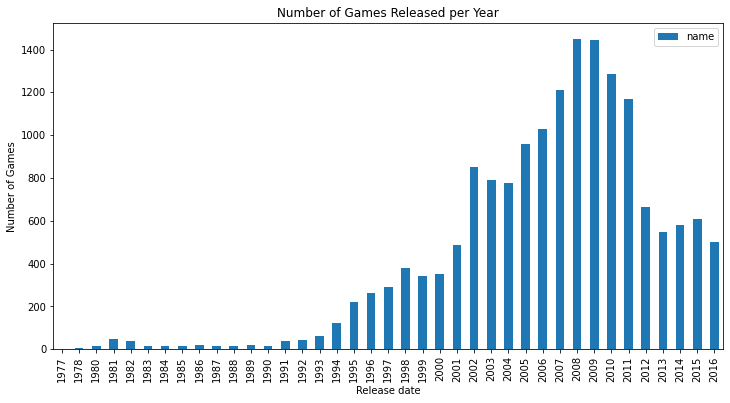

In [176]:
# Creemos una gráfica para contar juegos por año
year_counts = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count')

year_counts_sorted = year_counts.sort_index()

year_counts_sorted.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Release date')
plt.ylabel('Number of Games')
plt.title('Number of Games Released per Year')
plt.show()

Podemos ver que el año 2008 fue el pico de los lanzamientos, posteriormente disminuyó la cantidad de juego, tal vez se enfocaron en la calidad.

Observemos cómo varían las ventas de una plataforma a otra. Tenemos que elegir las plataformas con las mayores ventas totales y construir una distribución basada en los datos de cada año. Busquemos las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer? averiguemoslo.

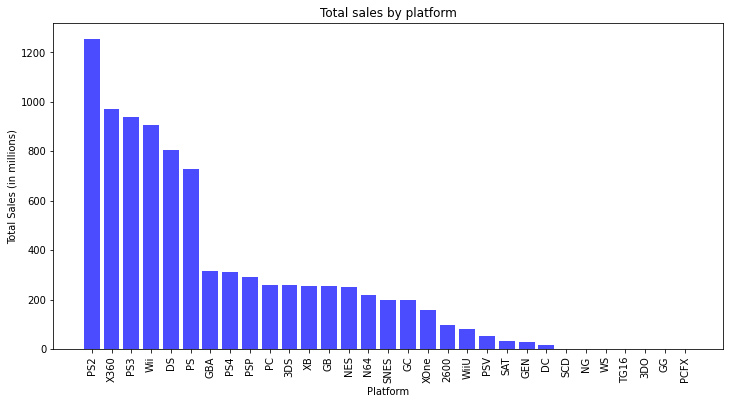

In [177]:
# Ahora, creamos el histograma para las ventas totales de cada plataforma
plt.figure(figsize=(12, 6))

ventas_plataformas = df.groupby('platform')['total_sales'].sum()

ventas_plataformas = ventas_plataformas.sort_values(ascending=False)

plt.bar(ventas_plataformas.index, ventas_plataformas.values, color='blue', alpha=0.7)
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Total sales by platform')
plt.xticks(rotation=90)
plt.show()

Vemos que el PS2 fue la consola con mayores ventas por mucho a comparación de las ventas de las otras plataformas, seguido del X360. La empresa Playstation tuvo 3 consolas dentro de las 6 consolas con mayor numero de ventas en este periodo.

Ahora veamos las plataformas más populares y su distribución por año

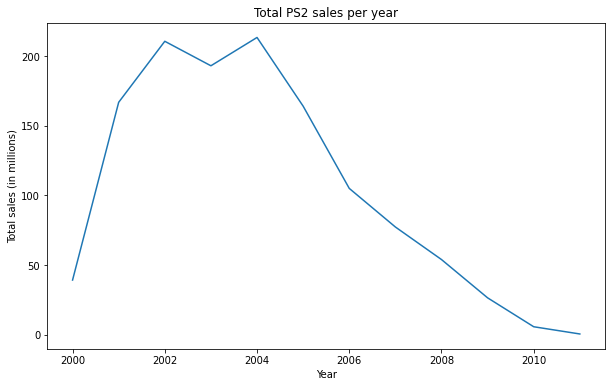

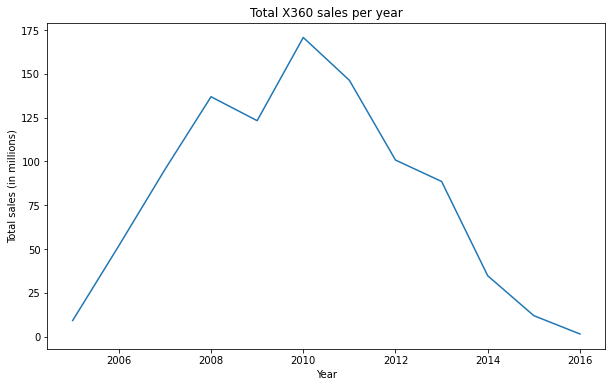

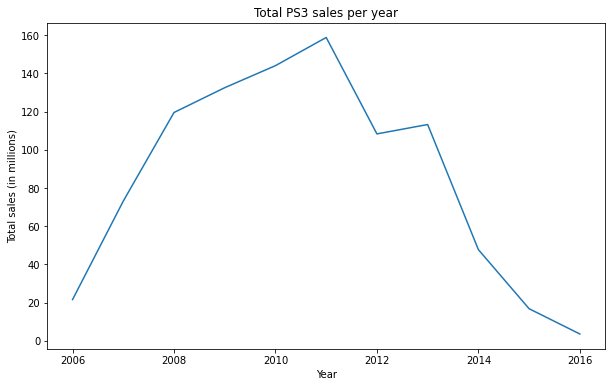

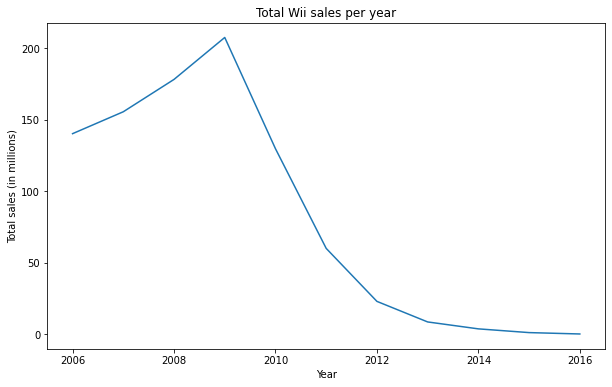

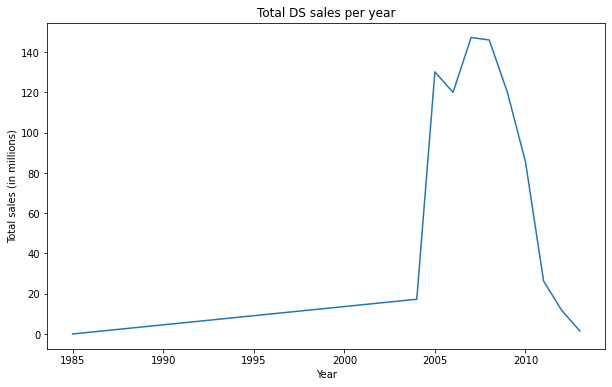

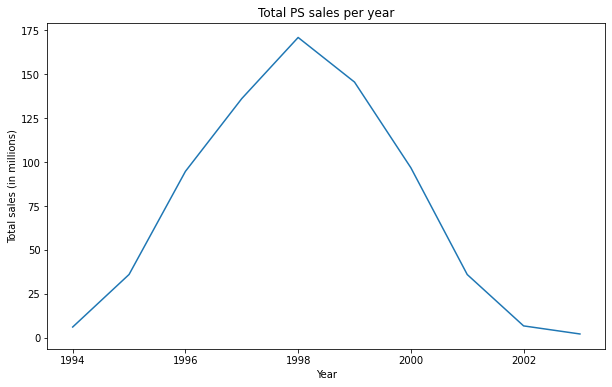

In [178]:
# Crear gráficos de línea para cada plataforma
df_sales = df[['platform', 'year_of_release', 'total_sales']]

platform_year_sales = df_sales.groupby(['platform', 'year_of_release']).sum().reset_index()

top_platforms = platform_year_sales.groupby('platform')['total_sales'].sum().nlargest(6).index.tolist()

for platform in top_platforms:
    plt.figure(figsize=(10, 6))
    plt.title(f'Total {platform} sales per year')
    plt.xlabel('Year')
    plt.ylabel('Total sales (in millions)')
    platform_data = platform_year_sales[platform_year_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'])
    plt.show()

MENCIONAR LOS PICOS DE CADA PLATAFORMA Y SU CAIDAAAAAAAAAAAAAAAAAAAAAAAAAAA

Ahora busquemos las plataformas que solian ser populares pero ahora no tienen ventas

In [179]:
# Filtrar el DataFrame para obtener las filas con ventas mayores a 1 para obtener las que menos tienen ventas al día de hoy
df_con_ventas = df[df['total_sales'] > 1]

plataformas_todas = df['platform'].unique()

plataformas_con_ventas_pasadas = df_con_ventas['platform'].unique()

plataformas_sin_ventas = list(set(plataformas_todas) - set(plataformas_con_ventas_pasadas))

print("Plataformas que solían ser populares pero ahora no tienen ventas:")
print(plataformas_sin_ventas)

Plataformas que solían ser populares pero ahora no tienen ventas:
['WS', '3DO', 'NG', 'GG', 'PCFX', 'TG16']


En este caso utilizamos una sola venta para determinar las plataformas que menos ventas tienen al momento del análisis

Ahora veamos cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer

In [180]:
vida_promedio_consola = df.groupby('platform').apply(lambda x: x['year_of_release'].max() - x['year_of_release'].min())

print("Vida promedio de cada consola:")
print(vida_promedio_consola)

Vida promedio de cada consola:
platform
2600    22
3DO      1
3DS     12
DC      10
DS      28
GB      13
GBA      7
GC       6
GEN      4
GG       0
N64      8
NES     11
NG       3
PC      31
PCFX     0
PS       9
PS2     11
PS3     10
PS4      3
PSP     11
PSV      8
SAT      5
SCD      1
SNES     9
TG16     0
WS       2
Wii     10
WiiU     4
X360    11
XB       8
XOne     3
dtype: int64


In [181]:
# Ahora veamos el promedio general de la vida de una consola
vida_promedio_consola.mean()

8.419354838709678

Veamos las primeras y últimas ventas de cada plataforma

In [182]:
ventas_plataformas = {}

plataformas = df['platform'].unique()


for plataforma in plataformas:
    df_plataforma = df[df['platform'] == plataforma]
    primer_venta = df_plataforma['year_of_release'].min()
    ultima_venta = df_plataforma['year_of_release'].max()
    
    ventas_plataformas[plataforma] = {'primer_venta': primer_venta, 'ultima_venta': ultima_venta}

for plataforma, ventas in ventas_plataformas.items():
    print(f'Plataforma: {plataforma}\nPrimer venta: {ventas["primer_venta"]}\nÚltima venta: {ventas["ultima_venta"]}\n')

Plataforma: Wii
Primer venta: 2006
Última venta: 2016

Plataforma: NES
Primer venta: 1983
Última venta: 1994

Plataforma: GB
Primer venta: 1988
Última venta: 2001

Plataforma: DS
Primer venta: 1985
Última venta: 2013

Plataforma: X360
Primer venta: 2005
Última venta: 2016

Plataforma: PS3
Primer venta: 2006
Última venta: 2016

Plataforma: PS2
Primer venta: 2000
Última venta: 2011

Plataforma: SNES
Primer venta: 1990
Última venta: 1999

Plataforma: GBA
Primer venta: 2000
Última venta: 2007

Plataforma: PS4
Primer venta: 2013
Última venta: 2016

Plataforma: 3DS
Primer venta: 2004
Última venta: 2016

Plataforma: N64
Primer venta: 1996
Última venta: 2004

Plataforma: PS
Primer venta: 1994
Última venta: 2003

Plataforma: XB
Primer venta: 2000
Última venta: 2008

Plataforma: PC
Primer venta: 1985
Última venta: 2016

Plataforma: 2600
Primer venta: 1977
Última venta: 1999

Plataforma: PSP
Primer venta: 2004
Última venta: 2015

Plataforma: XOne
Primer venta: 2013
Última venta: 2016

Plataforma:

Podemos ver que las plataformas **Wii, X360, PS3, PS4, PC, XOne, WiiU, PSV** tienen ventas registradas hasta 2016, pero puede que su último año de ventas no sea ese, ya que hasta ese año tenemos datos, además el promedio de vida de las consolas es de 8 a 9 años, por lo que estas consolas en el 2016 a penas estaban en su primera etapa.

Para nuestro análisis sobre el año 2017, tomaremos estas consolas mencionadas, ya que las demás no tendrán efecto alguno en el 2017, debido a sus últimas ventas en años anteriores.

In [183]:
plataformas = ['Wii', 'X360', 'PS3', 'PS4', 'PC', 'XOne', 'WiiU', 'PSV']

new_platforms = df[df['platform'].isin(plataformas)].copy()
new_platforms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6103 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6103 non-null   object 
 1   platform         6103 non-null   object 
 2   year_of_release  6103 non-null   int64  
 3   genre            6103 non-null   object 
 4   na_sales         6103 non-null   float64
 5   eu_sales         6103 non-null   float64
 6   jp_sales         6103 non-null   float64
 7   other_sales      6103 non-null   float64
 8   critic_score     4136 non-null   float64
 9   user_score       4201 non-null   float64
 10  rating           4477 non-null   object 
 11  total_sales      6103 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 619.8+ KB


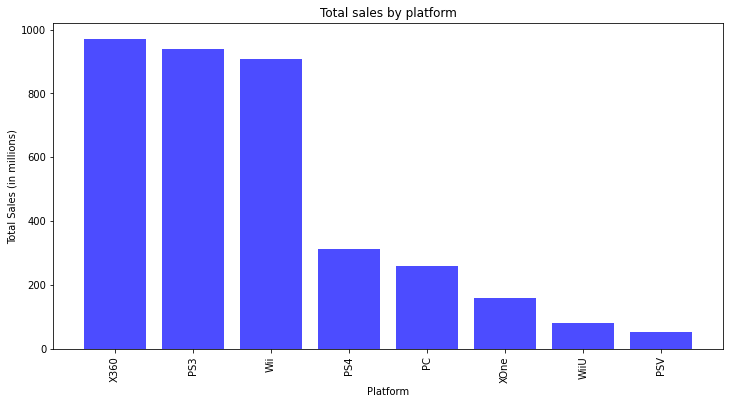

In [184]:
# Ahora, creamos el histograma para las ventas totales de cada plataforma
plt.figure(figsize=(12, 6))

ventas_nuevas_plataformas = new_platforms.groupby('platform')['total_sales'].sum()

ventas_nuevas_plataformas = ventas_nuevas_plataformas.sort_values(ascending=False)

plt.bar(ventas_nuevas_plataformas.index, ventas_nuevas_plataformas.values, color='blue', alpha=0.7)
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Total sales by platform')
plt.xticks(rotation=90)
plt.show()

Veamos cuáles crecen y cuáles se reducen

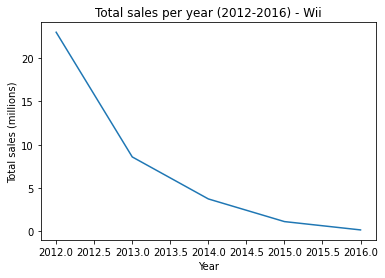

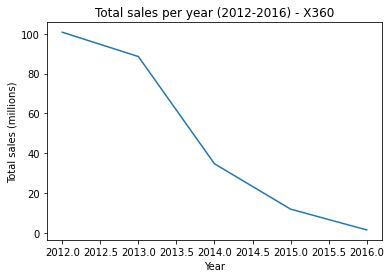

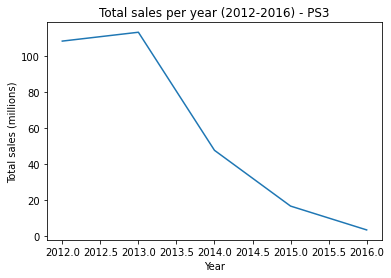

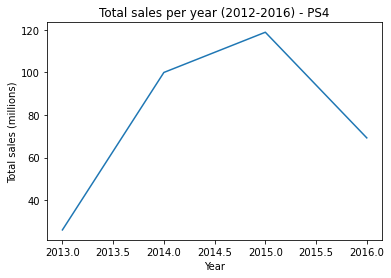

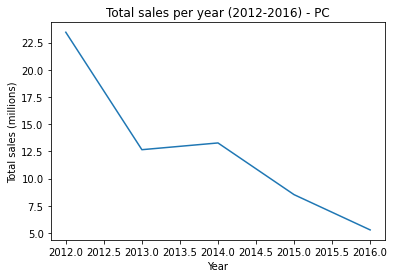

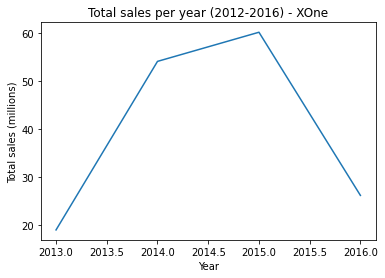

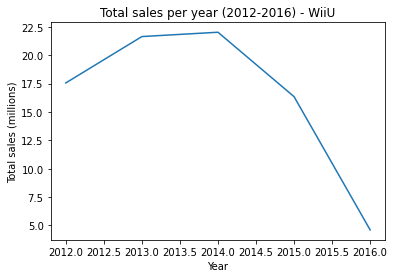

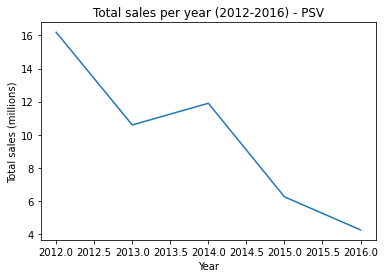

In [185]:
# Filtramos por los años de interés y sumamos las ventas totales por año para cada consola
for console in ['Wii', 'X360', 'PS3', 'PS4', 'PC', 'XOne', 'WiiU', 'PSV']:
    sales_by_year = new_platforms.loc[(new_platforms['year_of_release'] >= 2012) & (new_platforms['year_of_release'] <= 2016) & (new_platforms['platform'] == console)].groupby('year_of_release')['total_sales'].sum()
    plt.figure()
    plt.plot(sales_by_year.index, sales_by_year.values)
    plt.title('Total sales per year (2012-2016) - ' + console)
    plt.xlabel('Year')
    plt.ylabel('Total sales (millions)')

plt.show()

Como podemos ver, utilizamos las plataformas que siguen teniendo ventas con la conlcusión de la vida promedio de las consolas. El orden de las **ventas** de estas plataformas es el siguiente yendo de **mayor a menor**: **X360, PS3, Wii, PS4, PC, XOne, WiiU, PSV**. Cabe mencionar que las plataformas **PS4, XOne y WiiU** son las únicas plataformas que estan en su primer etapa, solamente llevan 3 años en el mercado y todavia no llegan a su auge y lo podemos ver en los gráficos anteriores, son las únicas plataformas con gráficos crecientes más prolongados.

Crearemos un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

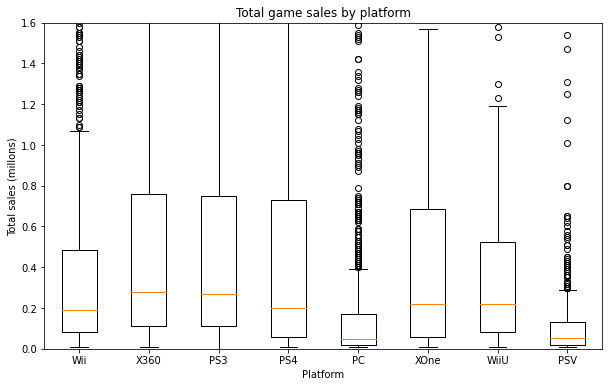

In [186]:
plataformas_interes = ['Wii', 'X360', 'PS3', 'PS4', 'PC', 'XOne', 'WiiU', 'PSV']
df_plataformas_interes = df[df['platform'].isin(plataformas_interes)]

# Diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot([df_plataformas_interes[df_plataformas_interes['platform'] == platform]['total_sales'] for platform in plataformas_interes])
plt.xlabel('Platform')
plt.ylabel('Total sales (millons)')
plt.title('Total game sales by platform')
plt.xticks(ticks=range(1, len(plataformas_interes) + 1), labels=plataformas_interes)
plt.ylim(0, 1.6)
plt.show()

    En general, se puede observar que las ventas promedio varían entre las plataformas, algunas plataformas como PS3 y X360 muestran ventas totales más altas en comparación con otras como PSv, y PC. Los valores atípicos de las plataformas indican que algunos juegos de las mismas plataformas han tenido mucho éxito en términos de ventas, por lo que ha hecho que las mismas plataformas generen mas ventas. Al ver este gráfico tengamos en cuenta que algunas pltaformas iban de salida y otras eran relativamente nuevas, por lo que algunas como X360 llevaban un acumulado de ventas por su tiempo en el mercado.

Ahora veamos cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (PS4). Crearemos un gráfico de dispersión y calcularemos la correlación entre las reseñas y las ventas.

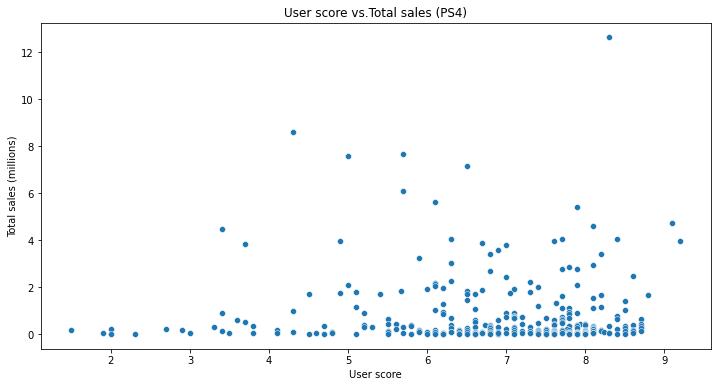

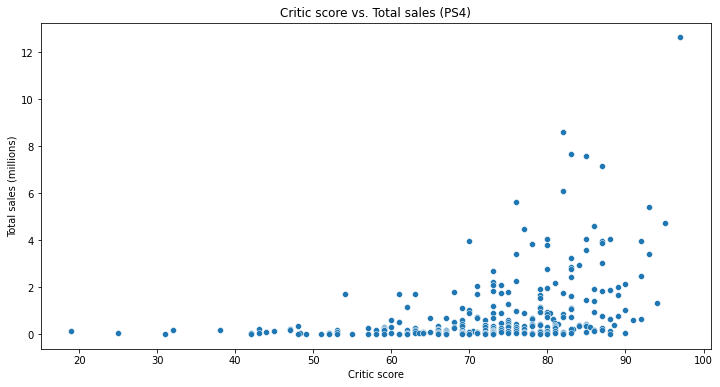

In [187]:
plt.figure(figsize=(12,6))
df_ps4 = df[df['platform'] == 'PS4']

# Gráfico de dispersión - puntuaciones de usuarios vs. ventas globales
sns.scatterplot(x='user_score', y='total_sales', data=df_ps4)
plt.title('User score vs.Total sales (PS4)')
plt.xlabel('User score')
plt.ylabel('Total sales (millions)')
plt.show()

plt.figure(figsize=(12,6))

# Gráfico de dispersión - puntuaciones de profesionales vs. ventas globales
sns.scatterplot(x='critic_score', y='total_sales', data=df_ps4)
plt.title('Critic score vs. Total sales (PS4)')
plt.xlabel('Critic score')
plt.ylabel('Total sales (millions)')
plt.show()

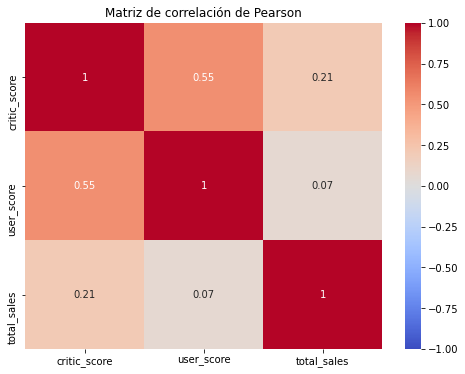

In [188]:
# Veamos la correlación entre las criticas y las ventas
cols_of_interest = ['critic_score', 'user_score', 'total_sales']
corr_data = new_platforms[cols_of_interest]

corr_matrix = corr_data.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación de Pearson')
plt.show()

Podemos ver que las **criticas de los usuarios no tienen un impacto considerable en las ventas** de los videojuegos, en cambio la **critica de los profesionales si la tiene**, no es muy consideable pero es positiva.

Comprobemos estos datos con algun juego en particular que comparta plataformas. Por ejemplo el que vimos en un análisis anterior, 'Grand theft auto v'

In [189]:
new_platforms.query('name == "Grand Theft Auto V"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


Todas las versiones del juego tienen una calificación alta de críticos, con una puntuación promedio de 97 en una escala de 0 a 100. Sin embargo, las puntuaciones de usuario varían ligeramente, con una puntuación promedio de 8.2 para la versión de PS3, 8.1 para la versión de X360, 8.3 para la versión de PS4, 7.9 para la versión de XOne, y 7.9 para la versión de PC en una escala de 0 a 10. Esto quiere decir que fue un juego exitoso en varias plataformas, sin embargo la **PC fue la plataforma en la que menor puntuaje recibio** y esto pudo ser por la moda del momento, las PC´s pudieron no haber estado en un buen momento de avances en cuenstión de gráficos, funcionalidad, facilidad o simplemente la meyor parte del mercado ya contaba con las consolas debido a su popularidad de años anteriores.

In [190]:
# Veamos otro ejemplo
new_platforms.query('name == "Call of Duty: Black Ops"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
1131,Call of Duty: Black Ops,PC,2010,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M,1.62
1412,Call of Duty: Black Ops,Wii,2010,Shooter,0.80,0.45,0.00,0.12,80.0,5.8,M,1.37


Aquí volvemos a ver que es un juego rentable para todas las plataformas, con buenas puntuaciones de los profesionales, sin embargo los usuarios no lo consideraron tan buen juego. Aun así consiguieron un buen número de ventas tanto la plataforma **'X360, como PS3'**. También puede influir la relación que tiene la emprea que desarrolla el juego con las empresas de las consolas. Seguramente este juego tuvo prioridad a 'Xbox' esto hace que influya fuertemente en las ventas de los videojuegos.

Para concluir, **La critica de los profesionales conlleva una relación más fuerte con las ventas que la critica de los usuarios** y este juego es el ejemplo perfecto.

Continuando nuestro análisis, veamos ahora la influencia entre el genero y las ventas

Empecemos mostrando las plataformas que tenemos en nuestro Dataframe original, despues veamos en la plataformas sleccionadas.

In [191]:
# Veamos las ventas por genero de todas nuestras plataformas
df_genre_sales = df.groupby('genre')['total_sales'].sum()

tabla1 = pd.DataFrame({'Genre': df_genre_sales.index, 'Total Sales (millions)': df_genre_sales.values})

tabla1 = tabla1.sort_values(by='Total Sales (millions)', ascending=False).reset_index(drop=True)
tabla1

,Genre,Total Sales (millions)
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


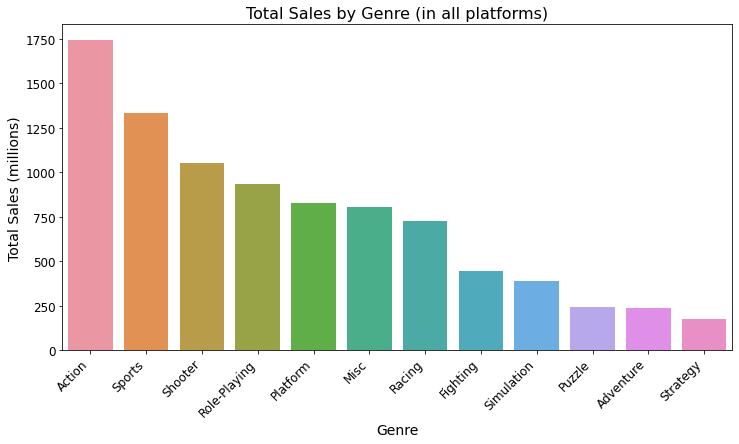

In [192]:
plt.figure(figsize=(12,6))

sns.barplot(x='Genre', y='Total Sales (millions)', data=tabla1)
plt.title('Total Sales by Genre (in all platforms)', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Sales (millions)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [193]:
# Veamos las ventas por genero de nuestras plataformas seleccionadas
df2_genre_sales = new_platforms.groupby('genre')['total_sales'].sum()

tabla2 = pd.DataFrame({'Genre': df2_genre_sales.index, 'Total Sales (millions)': df2_genre_sales.values})

tabla2 = tabla2.sort_values(by='Total Sales (millions)', ascending=False).reset_index(drop=True)

tabla2

,Genre,Total Sales (millions)
0,Action,856.76
1,Shooter,702.09
2,Sports,662.33
3,Misc,395.68
4,Role-Playing,261.32
5,Racing,233.60
6,Platform,163.18
7,Fighting,132.10
8,Simulation,115.18
9,Adventure,78.05


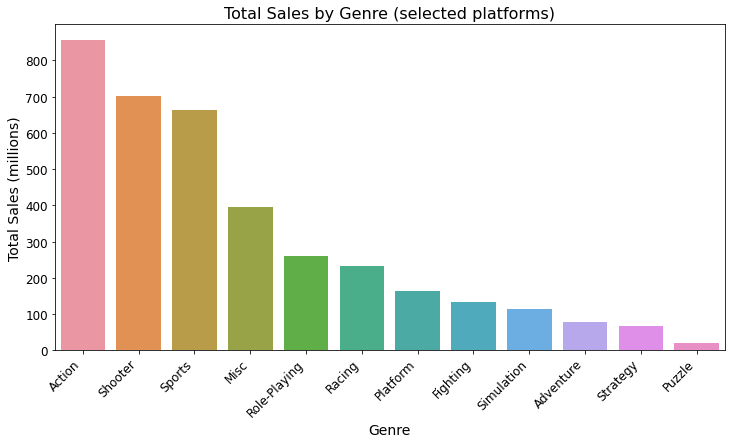

In [194]:
plt.figure(figsize=(12,6))

sns.barplot(x='Genre', y='Total Sales (millions)', data=tabla2)
plt.title('Total Sales by Genre (selected platforms)', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Sales (millions)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Podemos concluir que los generos de **acción, deportes y disparos** siguen siendo **populares** en términos de ventas totales en ambas situaciones, mientras que otros géneros pueden tener cambios en su popularidad dependiendo de las plataformas incluidas en el análisis. Debemos tener en cuenta que otros factores, como el ciclo de vida de las plataformas, la disponibilidad de juegos en cada plataforma y las preferencias de los consumidores, también pueden influir en los cambios en los géneros de los juegos y sus ventas. Las primeras plataformas fueron los 'conejillos de indias' para probar los generos más consumidos.

## Crear un perfil de usuario para cada región

Veamos las cinco plataformas principales para cada región.

In [195]:
plataformas_na = df.groupby('platform')['na_sales'].sum().nlargest(5).index.tolist()
plataformas_ue = df.groupby('platform')['eu_sales'].sum().nlargest(5).index.tolist()
plataformas_jp = df.groupby('platform')['jp_sales'].sum().nlargest(5).index.tolist()

print(f'The top five platforms for North America are:', plataformas_na)
print(f'The top five platforms for Europe are:', plataformas_ue)
print(f'The top five platforms for Japan are:', plataformas_jp)

The top five platforms for North America are: ['X360', 'PS2', 'Wii', 'PS3', 'DS']
The top five platforms for Europe are: ['PS2', 'PS3', 'X360', 'Wii', 'PS']
The top five platforms for Japan are: ['DS', 'PS', 'PS2', 'SNES', '3DS']


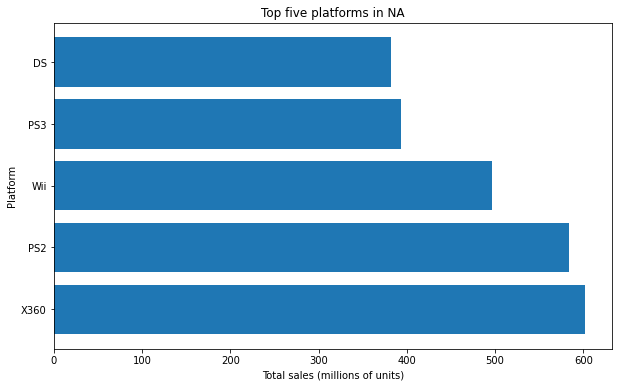

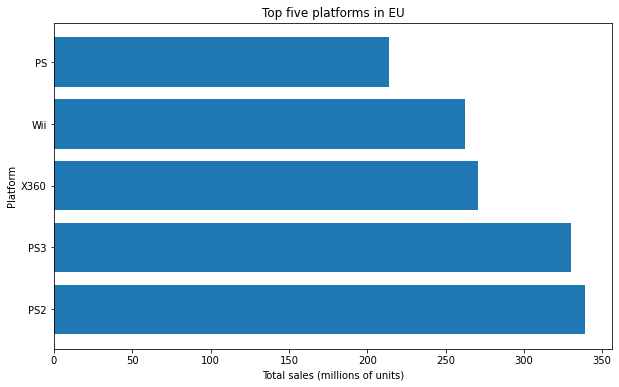

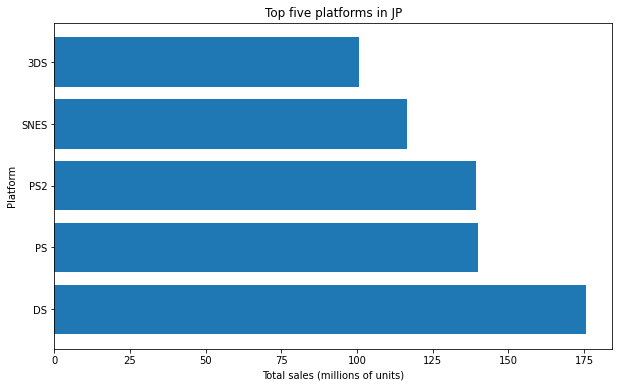

In [196]:
# Grafiquemos estos resultados
plataformas_por_region = {
    'NA': df.groupby('platform')['na_sales'].sum().nlargest(5).index.tolist(),
    'EU': df.groupby('platform')['eu_sales'].sum().nlargest(5).index.tolist(),
    'JP': df.groupby('platform')['jp_sales'].sum().nlargest(5).index.tolist()
}

for region, plataformas in plataformas_por_region.items():
    plt.figure(figsize=(10, 6))
    plt.barh(plataformas, df.groupby('platform')[f'{region.lower()}_sales'].sum().nlargest(5).values)
    plt.title(f'Top five platforms in {region}')
    plt.xlabel('Total sales (millions of units)')
    plt.ylabel('Platform')
    plt.show()

Ahora, calculemos y veamos las variaciones en sus cuotas de mercado de una región a otra.

In [197]:
cuota_na = df[df['platform'].isin(plataformas_na)]['na_sales'].sum() / df['na_sales'].sum()
cuota_ue = df[df['platform'].isin(plataformas_ue)]['eu_sales'].sum() / df['eu_sales'].sum()
cuota_jp = df[df['platform'].isin(plataformas_jp)]['jp_sales'].sum() / df['jp_sales'].sum()

print("Variación en la cuota de mercado en América del Norte: {:.2%}".format(cuota_na))
print("Variación en la cuota de mercado en Europa: {:.2%}".format(cuota_ue))
print("Variación en la cuota de mercado en Japón: {:.2%}".format(cuota_jp))

Variación en la cuota de mercado en América del Norte: 55.88%
Variación en la cuota de mercado en Europa: 58.42%
Variación en la cuota de mercado en Japón: 51.78%


Como vemos, con las 5 principales plataformas de cada región, se puede decir que **las variaciones en la cuota de mercado de esas plataformas son muy cercanas**, teniendo a Japón con el menor pocentaje de variación en las cuotas de mercado. Estas variaciones pueden deberse a diferentes preferencias de los consumidores, patrones culturales, regulaciones del mercado, entre otros factores. La PS2 es el ejemplo perfecto para este ejercicio. Podemos ver que en las tres regiones se mantiene en el top 3 de ventas, lo que hace que la variacion sea muy similar entre las regiones.

A continuación vemos los principales géneros de cada región

In [198]:
generos_na = df.groupby('genre')['na_sales'].sum().nlargest(5).index.tolist()
generos_ue = df.groupby('genre')['eu_sales'].sum().nlargest(5).index.tolist()
generos_jp = df.groupby('genre')['jp_sales'].sum().nlargest(5).index.tolist()

print(f'Los cinco géneros principales para América del Norte son:', generos_na)
print(f'Los cinco géneros principales para Europa son:', generos_ue)
print(f'Los cinco géneros principales para Japón son:', generos_jp)

Los cinco géneros principales para América del Norte son: ['Action', 'Sports', 'Shooter', 'Platform', 'Misc']
Los cinco géneros principales para Europa son: ['Action', 'Sports', 'Shooter', 'Racing', 'Misc']
Los cinco géneros principales para Japón son: ['Role-Playing', 'Action', 'Sports', 'Platform', 'Misc']


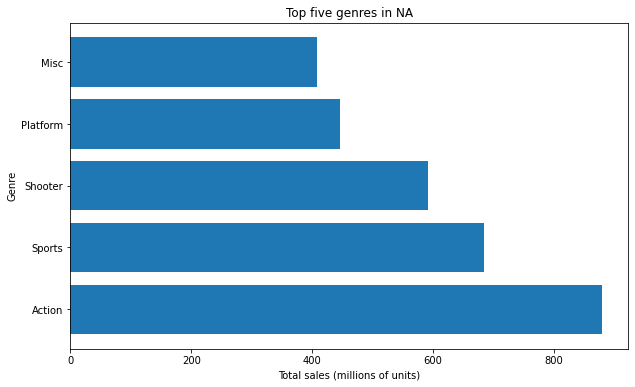

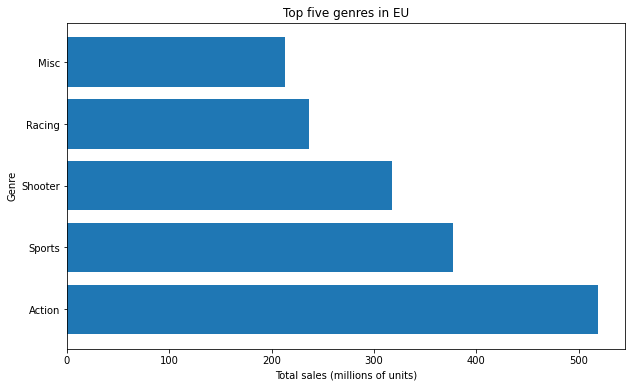

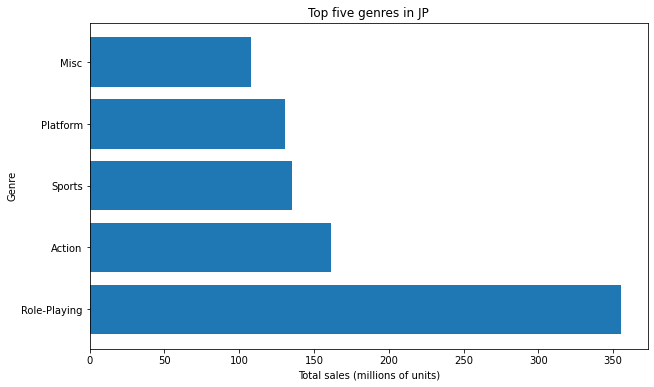

In [199]:
# Grafiquemos estos resultados
plataformas_por_region = {
    'NA': df.groupby('genre')['na_sales'].sum().nlargest(5).index.tolist(),
    'EU': df.groupby('genre')['eu_sales'].sum().nlargest(5).index.tolist(),
    'JP': df.groupby('genre')['jp_sales'].sum().nlargest(5).index.tolist()
}

for region, plataformas in plataformas_por_region.items():
    plt.figure(figsize=(10, 6))
    plt.barh(plataformas, df.groupby('genre')[f'{region.lower()}_sales'].sum().nlargest(5).values)
    plt.title(f'Top five genres in {region}')
    plt.xlabel('Total sales (millions of units)')
    plt.ylabel('Genre')
    plt.show()

Con estos resultados, podemos concluir que América del norte y Europa son muy parecidos en cuestión de cultura y gustos por los videojuegos, lo que sorpendió fueron los géneros más jugados en Japón, ya que cambian radicalmente, teniendo en primer lugar los juegos de **rol**.

Ahora, mostraremos las ventas totales por clasificación de ESRB y región

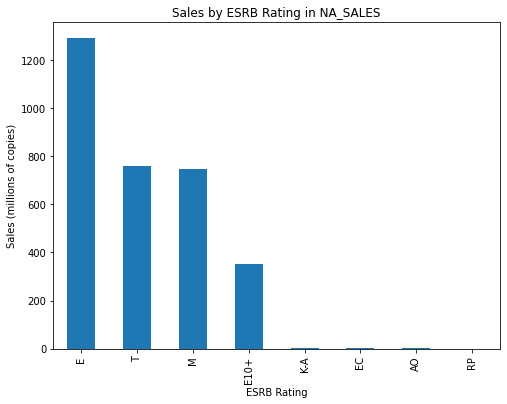

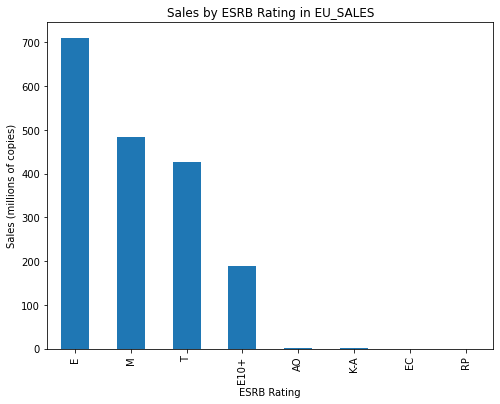

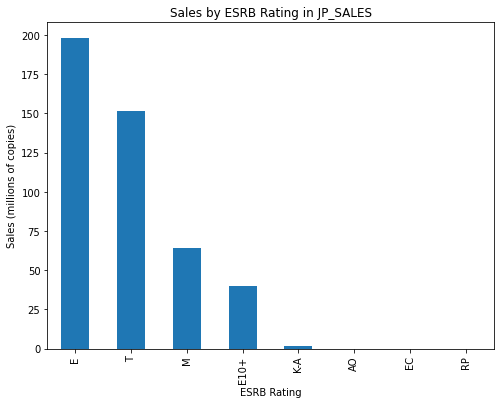

In [200]:
regiones = ['na_sales', 'eu_sales', 'jp_sales']

for region in regiones:
    plt.figure(figsize=(8, 6))
    df.groupby('rating')[region].sum().sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Sales by ESRB Rating in {region.upper()}')
    plt.xlabel('ESRB Rating')
    plt.ylabel('Sales (millions of copies)')
    plt.show()

Como podemos ver, parece que las clasificaciones de **ESRB pueden tener un efecto en las ventas** de juegos en regiones individuales, aunque **los patrones varían según la región**. Podemos ver que en Japón la cultura apunta a que los juegos de rol son más llamativos que otro tipo de juegos. Es importante tener en cuenta otros factores, como preferencias culturales y de mercado, marketing, etc. Estos datos también pueden influir en las ventas en cada región.

## Formulación de hipótesis

**1) Hipótesis 1**

1. Hipótesis nula H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Hipótesis nula H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

Para probar esta hipótesis, empezamos con dos pruebas; 'Shapiro-Wilk' y ´Levene' para asegurarnos que las distribuciones de ambas plataformas son normales y la igualdad de sus varianzas, después, se utilizó una **prueba de hipótesis de dos muestras independientes** utilizando la **prueba t**. Esta prueba compara las medias de dos muestras independientes y determina si hay evidencia estadística para afirmar que las medias son diferentes. Para finalizar, nos apoyamos con la prueba 'U de Whitney' que se utiliza cuando las distribuciones no son normales. El criterio utilizado para probar la hipótesis fue comparar el valor p obtenido con un **umbral de significancia de 0.05**

In [212]:
platform_xboxone_mean = new_platforms[new_platforms['platform'] == 'XOne'].mean()
platform_pc_mean = new_platforms[new_platforms['platform'] == 'PC'].mean()

In [209]:
platform_xboxone = new_platforms[new_platforms['platform'] == 'XOne']
platform_pc = new_platforms[new_platforms['platform'] == 'PC']

data_xboxone = platform_xboxone['user_score'].dropna()
data_pc = platform_pc['user_score'].dropna()

# Prueba de normalidad con Shapiro-Wilk para Xbox One
st_xboxone, p_shapiro_xboxone = shapiro(data_xboxone)
alpha = 0.05

if p_shapiro_xboxone > alpha:
    print("Los datos de Xbox One siguen una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los datos de Xbox One no siguen una distribución normal (se rechaza la hipótesis nula)")

# Prueba de normalidad con Shapiro-Wilk para PC
st_pc, p_shapiro_pc = shapiro(data_pc)
alpha = 0.05

if p_shapiro_pc > alpha:
    print("Los datos de PC siguen una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los datos de PC no siguen una distribución normal (se rechaza la hipótesis nula)")

# Prueba de igualdad de varianzas con Levene
st, p_levene = levene(data_xboxone, data_pc)
alpha = 0.05

if p_levene > alpha:
    equal_var = True
    print("Las varianzas son iguales (no se rechaza la hipótesis nula)")
else:
    equal_var = False
    print("Las varianzas no son iguales (se rechaza la hipótesis nula)")

# Aplicar t-test con el argumento equal_var definido en función de los resultados de Levene
st, p_ttest = ttest_ind(data_xboxone, data_pc, equal_var=equal_var)
alpha = 0.05

if p_ttest > alpha:
    print("No hay evidencia estadística para rechazar la hipótesis nula")
else:
    print("Hay evidencia estadística para rechazar la hipótesis nula")

Los datos de Xbox One no siguen una distribución normal (se rechaza la hipótesis nula)
Los datos de PC no siguen una distribución normal (se rechaza la hipótesis nula)
Las varianzas son iguales (no se rechaza la hipótesis nula)
Hay evidencia estadística para rechazar la hipótesis nula


In [210]:
# Prueba U de Mann-Whitney
statistic, pvalue = mannwhitneyu(data_xboxone, data_pc, alternative='two-sided')
alpha = 0.05
if pvalue > alpha:
    print("No hay evidencia estadística para rechazar la hipótesis nula.")
else:
    print("Hay evidencia estadística para rechazar la hipótesis nula.")

Hay evidencia estadística para rechazar la hipótesis nula.


In [218]:
# Veamos el promedio de las calificaciones de ambas plataformas
print(data_xboxone.mean())
print()
print(data_pc.mean())

6.6040857605178

7.057300084175084


Como vemos, hay evidencia estadística suficiente para afirmar que **las calificaciones promedio de los usuarios son diferentes para XOne y PC.** El valor p esta por debajo del umbral de significancia, esto significa que hay una **diferencia entre las calificaciones promedio de los usuarios para ambas plataformas.**

Ahora vamos a la segunda hipotesis

**2) Hipótesis 2**

1. Hipótesis nula H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
2. Hipótesis nula H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Para probar esta hipótesis, también empezamos con dos pruebas; 'Shapiro-Wilk' y ´Levene' para asegurarnos que las distribuciones de ambas plataformas son normales y la igualdad de sus varianzas, después, se utilizó una **prueba de hipótesis de dos muestras independientes** utilizando la **prueba t**. Esta prueba compara las medias de dos muestras independientes y determina si hay evidencia estadística para afirmar que las medias son diferentes. Para finalizar, nos apoyamos con la prueba 'U de Whitney' que se utiliza cuando las distribuciones no son normales. El criterio utilizado para probar la hipótesis fue comparar el valor p obtenido con un **umbral de significancia de 0.05**

In [101]:
genero_accion = new_platforms[new_platforms['genre'] == 'Action']
genero_deportes = new_platforms[new_platforms['genre'] == 'Sports']

user_score_accion = genero_accion['user_score'].dropna()
user_score_deportes = genero_deportes['user_score'].dropna()

# Prueba de normalidad con Shapiro-Wilk para género de Acción
stat_accion, p_shapiro_accion = shapiro(user_score_accion)
alpha = 0.05

if p_shapiro_accion > alpha:
    print("Los datos de Acción siguen una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los datos de Acción no siguen una distribución normal (se rechaza la hipótesis nula)")

# Prueba de normalidad con Shapiro-Wilk para género de Deportes
stat_deportes, p_shapiro_deportes = shapiro(user_score_deportes)
alpha = 0.05

if p_shapiro_deportes > alpha:
    print("Los datos de Deportes siguen una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los datos de Deportes no siguen una distribución normal (se rechaza la hipótesis nula)")

# Prueba de igualdad de varianzas con Levene
stat, p_levene = levene(user_score_accion, user_score_deportes)
alpha = 0.05

if p_levene > alpha:
    equal_var = True
    print("Las varianzas son iguales (no se rechaza la hipótesis nula)")
else:
    equal_var = False
    print("Las varianzas no son iguales (se rechaza la hipótesis nula)")

# Aplicar t-test con el argumento equal_var definido en función de los resultados de Levene
stat, p_ttest = ttest_ind(user_score_accion, user_score_deportes, equal_var=equal_var)
alpha = 0.05

if p_ttest > alpha:
    print("No hay evidencia estadística para rechazar la hipótesis nula")
else:
    print("Hay evidencia estadística para rechazar la hipótesis nula")

Los datos de Acción no siguen una distribución normal (se rechaza la hipótesis nula)
Los datos de Deportes no siguen una distribución normal (se rechaza la hipótesis nula)
Las varianzas no son iguales (se rechaza la hipótesis nula)
Hay evidencia estadística para rechazar la hipótesis nula


Ahora realizamos la prueba U de Mann-Whitney a continuación

In [102]:
# Realizar la Prueba U de Mann-Whitney
stat, p_mannwhitney = mannwhitneyu(user_score_accion, user_score_deportes)

alpha = 0.05

if p_mannwhitney > alpha:
    print("No hay evidencia estadística para rechazar la hipótesis nula")
else:
    print("Hay evidencia estadística para rechazar la hipótesis nula")

Hay evidencia estadística para rechazar la hipótesis nula


In [219]:
# Veamos el promedio de las calificaciones de ambas categorias
print(user_score_accion.mean())
print()
print(user_score_deportes.mean())

6.90409476560253

6.1839530988274705


Teniendo los resultados de la prueba de hipótesis, concluimos que **tenemos evidencia estadística suficiente para afirmar que las calificaciones promedio de los usuarios son diferentes para los géneros de acción y deportes**, ya que el valor p obtenido es menor que el umbral de significancia. **Se rechaza la hipótesis nula.**

## Conclusión general

En resumen, el proyecto realizado empezó con la exploración de datos. Aquí nos percatamos que teniamos demasiados valores ausentes en las columnas de calificaciones por usuario y por profesionales, así como en los años de lanzamiento. Estas columnas eran básicas para nuestro análisis de datos, así que encontramos varias maneras de rellenar esos datos nulos sin que afectara la calidad del proyecto. Estas técnicas las descubrimos en el misma exploración de datos. 
Algunos juegos fueron lanzados para diferentes plataformas en los mismos años. Aquí sustituimos esos años por los valores nulos de los mismos juegos, lo cual ayudó bastante.
Los valores nulos restantes optamos por rellenarlos de manera manual, ya que no eran muchos y así la calidad del análisis fue lo más alta posible. 

Para los valores nulos de las columnas de las calificaciones, utilizamos la primer técnica de la columna de años de lanzamiento ya que se trataban del mismo juego y como aquí pudo haber mayor variación, decidimos rellenar con el promedio de las calificaciones en otras plataformas.

En la etapa del análisis de datos, pudimos proyectar la cantidad de juegos que fueron lanzados en diferentes años, así como sus ventas y por ende, la **vida promedio de cada plataforma: 8 años y medio**.
Este análisis nos permitió hacer una proyección para el año 2017.

También pudimos ver cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma y nos dimos cuenta que **la critica de los profesionales conlleva una relación más fuerte con las ventas que la critica de los usuarios.**

En el tema de los géneros, concluimos que los **generos de acción, deportes y disparos siguen siendo populares** en términos de ventas totales, como lo han sido desde el principio de nuestras plataformas analizadas.

Otra de las conclusiones obtenidas durente el análisis fue que **las clasificaciones de ESRB pueden tener un efecto en las ventas de juegos en regiones individuales, aunque los patrones varían según la región.** Entre América del norte y Europa, fueron muy similares, pero en **Japón** cambiaron bastante los principales géneros de juegos más utilizados, siendo el número uno **juegos de rol**.

Con respecto a las **hipótesis probadas**, se concluyó que hay evidencia estadística para afirmar que **las calificaciones promedio de los usuarios son diferentes para las plataformas Xbox One y PC**, lo que indica que hay diferencias significativas en las calificaciones promedio de los usuarios entre estas dos plataformas. Sin embargo, **no se encontró suficiente evidencia estadística para afirmar que las calificaciones promedio de los usuarios son diferentes para los géneros de Acción y Deportes.**

Todo con el fin de identificar patrones que determinen si un juego tiene éxito o no. Esperamos que este análisis ayude a detectar proyectos prometedores y planificar campañas publicitarias.